# **Web And Social Media Analytics**


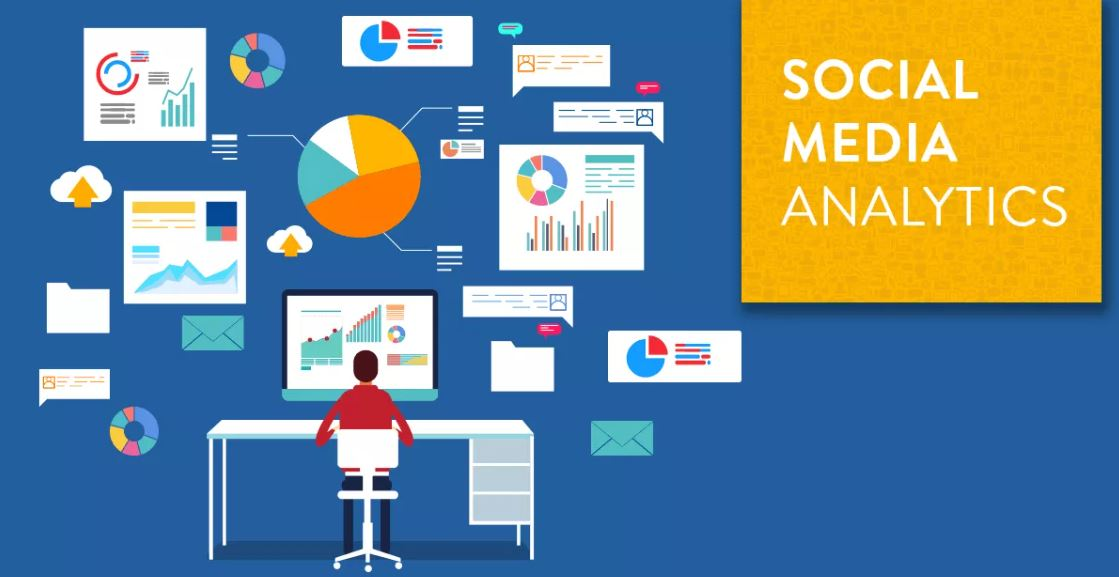


## Problem Statement

Customer is a mobile manufacturer based in the US, who entered the market three years ago. As a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly.They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

## Solution:
### The solution has been divided into two parts.
- Part 1: Deriving the business insights that are useful for product development and marketing.
- Part 2: Creating a sentiment classification engine.



### **Part 1: Deriving the business insights that are useful for product development and marketing.**

**Uploading the data from the google drive path**

In [ ]:
# importing drive to upload dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Libraries**

In [ ]:
# importing libraries to read to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# importing libraries for text analytics
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import TfidfVectorizer
import re 


# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve



In [ ]:
# copied dataset path under variable
url = '/content/gdrive/MyDrive/Web and social media analytics/Cell_Phones_and_Accessories_5.csv'

In [ ]:
# assign name to phone dataset to read it
phonedata = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from google.colab import files
# saving phone data to google drive
# phonedata.to_csv("/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/phonedata")

**Unziping Phone Meta Data**

In [ ]:
# # Reading the meta data
# # importing libraries

# import gzip
# import shutil

# #Path to the meta data zip file. 'Web and social media analytics' is the folder name under 'My Drive'
# path1 = '/content/gdrive/MyDrive/Web and social media analytics/meta_Cell_Phones_and_Accessories.json.gz'

# # Path to meta data .json file
# path2 = '/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/meta_Cell_Phones_and_Accessories.json'

# # # Unzipping the meta data file
# with gzip.open(path1, 'rb') as f_in:
#     with open(path2, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

**Note: All commented line of code is not to create multiple dataset while running the code and all created files can be accessed from the below google drive link.**

**Google drive Link**
**'https://drive.google.com/drive/folders/1jxIN8qlFgvn-fjIVkUyyXPb7czuZJo9L?usp=sharing'**

In [ ]:
# # Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
# import json

# # Empty list to store the dictonaries
# phonemetadata = []

# # Reading the dictionaries in the json file and appending it to the list phonemetadata[]
# with open(path2, 'r') as f:
#     for line in f:
#         phonemetadata.append(json.loads(line))

In [ ]:
#converting the list phonemetadata into a data frame
# metadata=pd.DataFrame(phonemetadata)

In [ ]:
# only need only cellphone 'category' to extract
# metadata["category_new"] = [l[1] if len(l) > 0 else np.nan for l in metadata["category"]]

In [ ]:
# cellphone_data = metadata[metadata["category_new"] == "Cell Phones"]

In [ ]:
# converting to csv file and storing it related to cellphone only
# cellphone_data.to_csv('/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/cellphone_data.csv')

In [ ]:
# reading the cellphone metadata
cellphone_data = pd.read_csv('/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/cellphone_data.csv')

In [ ]:
cellphone_data.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
0,36,"['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super big keyboard, Helpful Emergency call dial key -SOS-...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAND *WORLD PHONE* GSM CELL PHONE WHITE,[],"['https://images-na.ssl-images-amazon.com/images/I/41%2BgmCg3XpL._SX38_SY50_CR,0,0,38,50_.jpg', ...",NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900 MHZ', 'Dual SIM cards dual standby Super big keyb...","['>#6,356,920 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#32,86...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,1274,"['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']",NaN,['Standard package: 1 x original phone 1 x Quality battery 1 x New charger 1 x Box'],NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']","['https://images-na.ssl-images-amazon.com/images/I/41PM889JFWL._SS40_.jpg', 'https://images-na.s...",NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classic model', 'Small, handy, easy to use']","['>#32,759 in Electronics (See Top 100 in Electronics)', '>#1,430 in Electronics > Cell Phones &...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0757B64H2', 'B00851Q9L0', 'B076BVNGZQ', 'B07BTG3T3Y...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by TracFone, a leading national prepaid service provider....",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 10 FREE MINUTES,[],"['https://images-na.ssl-images-amazon.com/images/I/31N85ZGWP6L._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones
3,1354,"['Cell Phones & Accessories', 'Cell Phones', 'Carrier Cell Phones']",NaN,"['Based on Motorola&#x92;s i90c phone, the i95cl offers some valuable upgrades that increase the...",NaN,Motorola i95cl Phone (Nextel),[],"['https://images-na.ssl-images-amazon.com/images/I/41Z5GT0W86L._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#4,421...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH,Cell Phones
4,1361,"['Cell Phones & Accessories', 'Cell Phones', 'Carrier Cell Phones']",NaN,['This is a GSM Samsung R225 cellular phone that was activated through T-Mobile.This is ONLY com...,NaN,T-Mobile Dual-Band Wireless Phone,[],"['https://images-na.ssl-images-amazon.com/images/I/4137ET4GRXL._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#5,268...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB,Cell Phones


## **Step 1: Data Understanding And Preparation**



In [ ]:
# Reading the phone data
phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT. JUST NOT WHAT I EXPECTED.,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [ ]:
# checking the dataset shape
phonedata.shape

(1128437, 12)

In [ ]:
# Checking the information related to each column details
phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [ ]:
# checking numerical description of dataset
phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [ ]:
# saving the vote column along with related asin for further analysis
users_vote= phonedata[['asin', 'vote']]
users_vote

,asin,vote
0,7508492919,NaN
1,7508492919,NaN
2,7508492919,NaN
3,7508492919,NaN
4,7508492919,NaN
...,...,...
1128432,B01HJC7N4C,NaN
1128433,B01HJC7N4C,NaN
1128434,B01HJC7N4C,NaN
1128435,B01HJC7N4C,NaN


In [ ]:
# len(df['asin'].value_counts())
len(phonedata['asin'].value_counts())

48186

## **1.2: EDA**

### Data Cleaning and Pre-Processing

In [ ]:
# checking the description of numerical
phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [ ]:
# Percentage of null values in each column
# Function_name : NaN_per
# Usage : To return % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing features having missing values and % of missing values in those features

def null_value(phonedata):
    missing = pd.DataFrame(columns=['features','percentage'])
    for col in phonedata.columns:
        if phonedata[col].isna().values.any() :
            percentage = round(phonedata[col].isna().sum()/len(phonedata.index)*100, 2)
            missing = missing.append({'features' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [ ]:
null_value(phonedata)

,features,percentage
0,style,46.36
1,reviewerName,0.01
2,reviewText,0.07
3,summary,0.05
4,vote,91.84
5,image,97.60


In [ ]:
# fill null values in vote to 0
phonedata['vote'].fillna(0,inplace=True)

In [ ]:
# droping the columns with more than 40% null values
phonedata.drop(columns=['style', 'image'], axis=1, inplace=True)

In [ ]:
# check null percentage of dataframe
# df_nulls = null_value(df)
df_nulls = null_value(phonedata)
df_nulls.sort_values('percentage', ascending=False)

,features,percentage
1,reviewText,0.07
2,summary,0.05
0,reviewerName,0.01


### If review text is null then its not going to usefull to perform sentiment analysis, so we will drop rows having reviewtext null

In [ ]:
# droping the rows with null counts
phonedata = phonedata[phonedata['reviewText'].notna()]

### No null values found in the *column*

In [ ]:
#Transforming unixReview time to date time format
from datetime import datetime, timedelta
phonedata['Date&Time'] = phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [ ]:
# check null percentage of dataframe
Nulls_df = null_value(phonedata)
Nulls_df.sort_values('percentage', ascending=False)

,features,percentage
1,summary,0.04
0,reviewerName,0.01


### **Meta Data(Cellphone Data) Cleaning and Analysis**

In [ ]:
cellphone_data.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
0,36,"['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super big keyboard, Helpful Emergency call dial key -SOS-...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAND *WORLD PHONE* GSM CELL PHONE WHITE,[],"['https://images-na.ssl-images-amazon.com/images/I/41%2BgmCg3XpL._SX38_SY50_CR,0,0,38,50_.jpg', ...",NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900 MHZ', 'Dual SIM cards dual standby Super big keyb...","['>#6,356,920 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#32,86...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,1274,"['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']",NaN,['Standard package: 1 x original phone 1 x Quality battery 1 x New charger 1 x Box'],NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']","['https://images-na.ssl-images-amazon.com/images/I/41PM889JFWL._SS40_.jpg', 'https://images-na.s...",NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classic model', 'Small, handy, easy to use']","['>#32,759 in Electronics (See Top 100 in Electronics)', '>#1,430 in Electronics > Cell Phones &...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0757B64H2', 'B00851Q9L0', 'B076BVNGZQ', 'B07BTG3T3Y...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by TracFone, a leading national prepaid service provider....",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 10 FREE MINUTES,[],"['https://images-na.ssl-images-amazon.com/images/I/31N85ZGWP6L._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones
3,1354,"['Cell Phones & Accessories', 'Cell Phones', 'Carrier Cell Phones']",NaN,"['Based on Motorola&#x92;s i90c phone, the i95cl offers some valuable upgrades that increase the...",NaN,Motorola i95cl Phone (Nextel),[],"['https://images-na.ssl-images-amazon.com/images/I/41Z5GT0W86L._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#4,421...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH,Cell Phones
4,1361,"['Cell Phones & Accessories', 'Cell Phones', 'Carrier Cell Phones']",NaN,['This is a GSM Samsung R225 cellular phone that was activated through T-Mobile.This is ONLY com...,NaN,T-Mobile Dual-Band Wireless Phone,[],"['https://images-na.ssl-images-amazon.com/images/I/4137ET4GRXL._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories)', '>#5,268...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB,Cell Phones


In [ ]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9823 non-null   int64  
 1   category      9823 non-null   object 
 2   tech1         31 non-null     object 
 3   description   9823 non-null   object 
 4   fit           0 non-null      float64
 5   title         9823 non-null   object 
 6   also_buy      9823 non-null   object 
 7   image         9823 non-null   object 
 8   tech2         9 non-null      object 
 9   brand         9697 non-null   object 
 10  feature       9823 non-null   object 
 11  rank          9823 non-null   object 
 12  also_view     9823 non-null   object 
 13  details       9823 non-null   object 
 14  main_cat      9809 non-null   object 
 15  similar_item  2934 non-null   object 
 16  date          239 non-null    object 
 17  price         1745 non-null   object 
 18  asin          9823 non-null 

In [ ]:
# checking null percentage of metaData
Meta_nulls = null_value(cellphone_data)
Meta_nulls.sort_values('percentage', ascending=False)

,features,percentage
1,fit,100.00
2,tech2,99.91
0,tech1,99.68
6,date,97.57
7,price,82.24
5,similar_item,70.13
3,brand,1.28
4,main_cat,0.14


In [ ]:
# re-checking information related to columns
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9823 non-null   int64  
 1   category      9823 non-null   object 
 2   tech1         31 non-null     object 
 3   description   9823 non-null   object 
 4   fit           0 non-null      float64
 5   title         9823 non-null   object 
 6   also_buy      9823 non-null   object 
 7   image         9823 non-null   object 
 8   tech2         9 non-null      object 
 9   brand         9697 non-null   object 
 10  feature       9823 non-null   object 
 11  rank          9823 non-null   object 
 12  also_view     9823 non-null   object 
 13  details       9823 non-null   object 
 14  main_cat      9809 non-null   object 
 15  similar_item  2934 non-null   object 
 16  date          239 non-null    object 
 17  price         1745 non-null   object 
 18  asin          9823 non-null 

In [ ]:
# need to drop category column as we already created new column category_new based of cell
cellphone_data.drop('category', axis=1, inplace= True)

In [ ]:
# dropping column Unnamed as it is not required
cellphone_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Now checking the duplicate asin in metadata
len(cellphone_data[cellphone_data.duplicated('asin')])

34

In [ ]:
# dropping duplicates as only unique asin should be present
cellphone_data = cellphone_data.drop_duplicates()

In [ ]:
# checking if rank has any blank value
len(cellphone_data[cellphone_data['rank']=='[]'])


191

In [ ]:
# checkin if feature has blank values
len(cellphone_data[cellphone_data['feature']=='[]'])

1360

In [ ]:
# checking null percentage of dataframe

Meta_nulls.sort_values('percentage', ascending=False)

,features,percentage
1,fit,100.00
2,tech2,99.91
0,tech1,99.68
6,date,97.57
7,price,82.24
5,similar_item,70.13
3,brand,1.28
4,main_cat,0.14


In [ ]:
print(len(Meta_nulls.sort_values('percentage', ascending=False)))

8


In [ ]:
cellphone_data.isnull().sum()/len(cellphone_data.index * 100)

tech1           0.996833
description     0.000000
fit             1.000000
title           0.000000
also_buy        0.000000
image           0.000000
tech2           0.999081
brand           0.012565
feature         0.000000
rank            0.000000
also_view       0.000000
details         0.000000
main_cat        0.001430
similar_item    0.700378
date            0.975891
price           0.821943
asin            0.000000
category_new    0.000000
dtype: float64

### We see the 8 columns with null values however, column 'title' and 'main_cat' has nulls in decimals
**Price** is important feature, so will impute with the mean value of brand's price

In [ ]:
cellphone_data['price'].value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# impute null where price having descriptive text
cellphone_data["price"]=[np.nan if len(str(x))>15 else x for x in cellphone_data["price"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cellphone_data['price'].value_counts()

$40.08     133
$27.57     129
$16.00      44
$49.99      38
$54.99      30
          ... 
$159.06      1
$82.00       1
$272.98      1
$37.28       1
$75.24       1
Name: price, Length: 722, dtype: int64

In [ ]:
# replace $ to none and convert price to float
cellphone_data["price"]= cellphone_data["price"].str.replace("$",'')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
# replace , to none
cellphone_data["price"]= cellphone_data["price"].str.replace(",",'')



In [ ]:
# converting price column from object dtype to numeric
cellphone_data['price']= pd.to_numeric(cellphone_data['price'], errors='coerce')

In [ ]:
# checking the overall null values in price column
cellphone_data["price"].isnull().sum()

8092

In [ ]:
# checking the brand wise null value
cellphone_data[cellphone_data["price"].isnull()]['brand'].value_counts()

Samsung         1209
LG               616
Motorola         591
Nokia            452
BLU              440
                ... 
Social Drive       1
MYSAGA             1
GoPro              1
LSoug              1
BEISTE             1
Name: brand, Length: 873, dtype: int64

In [ ]:
# imputing null price with their brand's mean price 
cellphone_data['price'] = cellphone_data['price'].fillna(cellphone_data.groupby('brand')['price'].transform('mean'))

In [ ]:
cellphone_data.isnull().sum()/len(cellphone_data.index)*100

tech1            99.683318
description       0.000000
fit             100.000000
title             0.000000
also_buy          0.000000
image             0.000000
tech2            99.908060
brand             1.256512
feature           0.000000
rank              0.000000
also_view         0.000000
details           0.000000
main_cat          0.143018
similar_item     70.037798
date             97.589131
price            22.096230
asin              0.000000
category_new      0.000000
dtype: float64

In [ ]:
# checking null percentage of metadata
Metadata_nulls = null_value(cellphone_data)
Metadata_nulls.sort_values('percentage', ascending=False)

,features,percentage
1,fit,100.00
2,tech2,99.91
0,tech1,99.68
6,date,97.59
5,similar_item,70.04
7,price,22.10
3,brand,1.26
4,main_cat,0.14


### Droping columns with more than 50% null values

In [ ]:
# as we can see fit,tech2,tech1,date,similar_item columns have more than 70% data are null so we will drop this columns
unwanted = []
for i in range(8):
    if Metadata_nulls["percentage"][i] >= 50.0:
        unwanted.append(Metadata_nulls["features"][i])
# meta_data.drop(columns=['fit', 'tech2', 'tech1', 'date', 'similar_item'], axis=1)

In [ ]:
cellphone_data.drop(labels=unwanted, axis=1, inplace=True)

In [ ]:
# also dropping main_cat as we only require cellphone data
cellphone_data.drop(['main_cat'], axis=1, inplace=True)


In [ ]:
# as we are peforming text analysis, image column is not required
cellphone_data.drop(['image'], axis=1, inplace=True)

In [ ]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9822
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9666 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7626 non-null   float64
 9   asin          9789 non-null   object 
 10  category_new  9789 non-null   object 
dtypes: float64(1), object(10)
memory usage: 917.7+ KB


In [ ]:
# extracting rank in cellphones and acessories 
cellphone_data["new_rank"]=cellphone_data["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]

In [ ]:
cellphone_data["new_rank"]=cellphone_data["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")

In [ ]:
# converting new rank column to integer
cellphone_data["new_rank"] = cellphone_data["new_rank"].astype("float")

In [ ]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9822
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9666 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7626 non-null   float64
 9   asin          9789 non-null   object 
 10  category_new  9789 non-null   object 
 11  new_rank      9400 non-null   float64
dtypes: float64(2), object(10)
memory usage: 994.2+ KB


In [ ]:
# dropping rank column as we got new_rank column
cellphone_data.drop(["rank"],axis=1, inplace=True)

In [ ]:
cellphone_data.head(5)

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,new_rank
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super big keyboard, Helpful Emergency call dial key -SOS-...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAND *WORLD PHONE* GSM CELL PHONE WHITE,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900 MHZ', 'Dual SIM cards dual standby Super big keyb...",[],{},NaN,8050110508,Cell Phones,6356920.0
1,['Standard package: 1 x original phone 1 x Quality battery 1 x New charger 1 x Box'],Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classic model', 'Small, handy, easy to use']","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0757B64H2', 'B00851Q9L0', 'B076BVNGZQ', 'B07BTG3T3Y...",{},92.513680,B00005KBGR,Cell Phones,NaN
2,"[""The Nokia 5180i is a handset offered by TracFone, a leading national prepaid service provider....",Nokia 5180i TracFone Prepaid Cell Phone with 10 FREE MINUTES,[],Nokia,[],[],{},92.513680,B00005S0M4,Cell Phones,NaN
3,"['Based on Motorola&#x92;s i90c phone, the i95cl offers some valuable upgrades that increase the...",Motorola i95cl Phone (Nextel),[],NaN,[],[],{},NaN,B00006J9HH,Cell Phones,3798962.0
4,['This is a GSM Samsung R225 cellular phone that was activated through T-Mobile.This is ONLY com...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],[],{},117.247465,B00006LIQB,Cell Phones,5552033.0


### We have also_view column to drive viewed brand by customers

In [ ]:
# we have also_view column , from which we will derive also_view_brand column

# convert also_view brand to list 
cellphone_data=cellphone_data.assign(also_view_new=cellphone_data.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'',"").str.split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
# function to get brand name from the list of also_view

def getalsoview_brand(l):
    lb=[]
    brand=""
    for i in range(0,len(l)):
        b=cellphone_data[cellphone_data["asin"]==l[i]]["brand"]
    
        if len(b)>0:
            brand=b.values[0]
            if brand not in lb:
                lb.append(brand)
    
    return lb

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
# fetch unique brand from also view 
cellphone_data["also_view_brand"] =[getalsoview_brand(l) if len(l) > 0 else np.nan for l in cellphone_data["also_view_new"]]

In [ ]:
# now dropping columns also_view
cellphone_data.drop('also_view', axis=1, inplace=True)

In [ ]:
cellphone_data.head()

,description,title,also_buy,brand,feature,details,price,asin,category_new,new_rank,also_view_new,also_view_brand
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super big keyboard, Helpful Emergency call dial key -SOS-...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAND *WORLD PHONE* GSM CELL PHONE WHITE,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900 MHZ', 'Dual SIM cards dual standby Super big keyb...",{},NaN,8050110508,Cell Phones,6356920.0,[],[]
1,['Standard package: 1 x original phone 1 x Quality battery 1 x New charger 1 x Box'],Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classic model', 'Small, handy, easy to use']",{},92.513680,B00005KBGR,Cell Phones,NaN,"[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H2, B00851Q9L0, B076BVNGZQ, B07BTG3T3Y, B0172EEAQQ,...","[Nokia, Caterpillar, BLU, Fsmart, ZTE, Higoo]"
2,"[""The Nokia 5180i is a handset offered by TracFone, a leading national prepaid service provider....",Nokia 5180i TracFone Prepaid Cell Phone with 10 FREE MINUTES,[],Nokia,[],{},92.513680,B00005S0M4,Cell Phones,NaN,[],[]
3,"['Based on Motorola&#x92;s i90c phone, the i95cl offers some valuable upgrades that increase the...",Motorola i95cl Phone (Nextel),[],NaN,[],{},NaN,B00006J9HH,Cell Phones,3798962.0,[],[]
4,['This is a GSM Samsung R225 cellular phone that was activated through T-Mobile.This is ONLY com...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],{},117.247465,B00006LIQB,Cell Phones,5552033.0,[],[]


In [ ]:
# checking the numerical column
cellphone_data.describe()

,price,new_rank
count,7626.000000,9.400000e+03
mean,97.247979,1.857680e+06
std,73.982238,1.790868e+06
min,4.800000,7.770000e+02
25%,69.000000,5.561145e+05
50%,79.675088,1.226360e+06
75%,117.247465,2.444491e+06
max,1924.000000,7.731287e+06


In [ ]:
# checking the null percentage of dataframe
Meta_nulls = null_value(cellphone_data)
Meta_nulls.sort_values('percentage', ascending=False)

,features,percentage
1,price,22.10
2,new_rank,3.97
0,brand,1.26


### will keep the null values for top brand analysis

## **Merging Dataframe**
### Merge both dataframe one contain phoneData and other containing reviews

In [ ]:
# merge two dataframe 
# we will use innerjoin to merge two dataframe 
df_merged = pd.merge(phonedata, cellphone_data, how='inner', on=['asin'])

In [ ]:
# saving the file in the gdrive
# df_merged.to_csv("/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/df_merged.csv")

In [ ]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,Bad reception,1095724800,2.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",The best phone I've ever owned,1081728000,4.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [ ]:


# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_merged["verified"].replace({False: 0, True: 1}, inplace=True)


In [ ]:
# copied merged file for converting it to excel format
df_merged1 = df_merged.copy()

In [ ]:
# removing IllegalCodeError due to unicode error
df_merged1 = df_merged1.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)

In [ ]:
# converting to xlsx format and saving in gdrive
# df_merged1.to_excel(r"/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/merged_excelfile.xlsx", index=False, header=True)

In [ ]:
len(df_merged)

63838

In [ ]:
# counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

### **Checking counts of positive and negative table**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


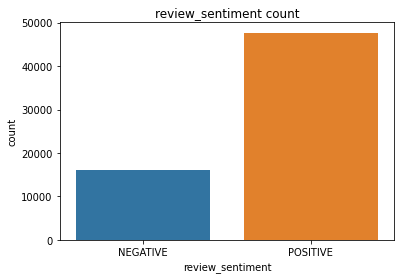

In [ ]:
plt.title("review_sentiment count")
sns.countplot(df_merged['review_sentiment'])
plt.show()

In [ ]:
# display number of positive and negative reviews

neg  = pos_neg[1]
pos  = pos_neg[0]

print("No. of negative review: ", neg)
print("\nNo. of positive review: ", pos)
print("\nnegative review rate is about {0}%".format(
    round((neg/float(pos+neg))*100), 2))
print("\npositve review rate is about {0}%".format(
    round((pos/float(pos+neg))*100), 2))

No. of negative review:  16161

No. of positive review:  47677

negative review rate is about 25%

positve review rate is about 75%


### We can see data is imbalance.


### **Let's check how review sentiment change the overall rating**

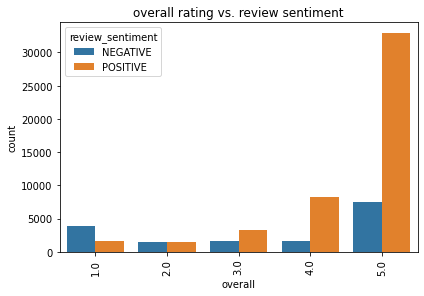

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["overall"],hue=df_merged["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

### Observation : From above plot we can say that positive reviews have high overall rating as expected , no any different pattern found. for rating 1 the negative reviews are more.

**Top 10 Brands by review count**

In [ ]:
# top 10 brand having more count of reviews
df_merged['brand'].value_counts()[:10]

Samsung       16195
BLU            9328
LG             6657
Motorola       4922
Nokia          4885
Apple          4049
BlackBerry     3656
HTC            2453
Sony           1556
Huawei         1401
Name: brand, dtype: int64

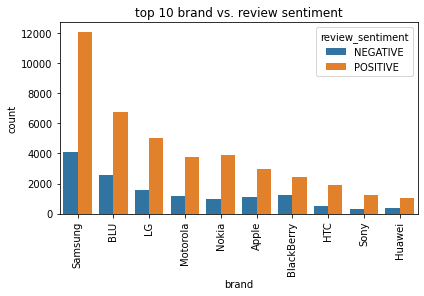

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],hue=df_merged["review_sentiment"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()

**Top 10 brands Vs their ranks in cellphone category**

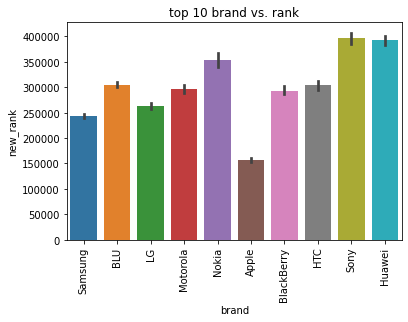

In [ ]:
plt.figure()
sns.barplot (data=df_merged,x=df_merged["brand"],y=df_merged["new_rank"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title("top 10 brand vs. rank")
plt.show()

### It shows Sony leading with rank category

**Let's check the verified reviews**

In [ ]:
df_merged["verified"].value_counts()

1    54994
0     8844
Name: verified, dtype: int64

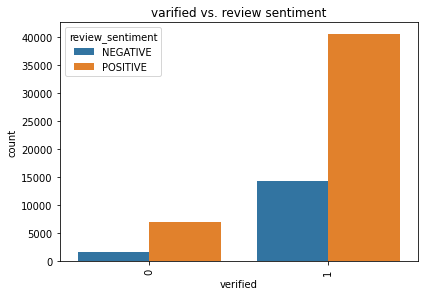

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["verified"],hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("varified vs. review sentiment")
plt.show()

## Majority of reviews are verified

**Number of reviews per year**

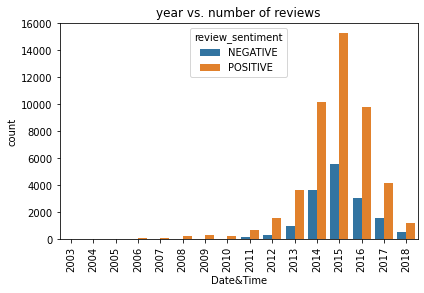

In [ ]:
plt.figure()
sns.countplot(data=df_merged,x=pd.DatetimeIndex(df_merged['Date&Time']).year,hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("year vs. number of reviews")
plt.show()

### Between 2014-2016, highest reviews received and see downward trend post that

**Top 10 Brands Prices**

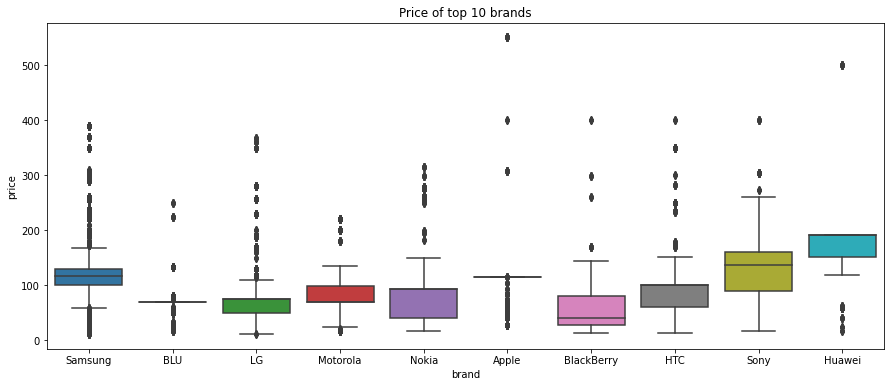

In [ ]:
plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged["brand"].value_counts().iloc[:10].index)
plt.show()

**Price distribution**

In [ ]:
df_merged["price"].value_counts()

69.594118     8495
117.247465    6951
115.123617    3315
75.618945     3009
69.264778     2579
              ... 
22.990000        5
219.490000       3
17.970000        3
18.970000        3
48.950000        1
Name: price, Length: 437, dtype: int64

**Reviews price distribution wise**

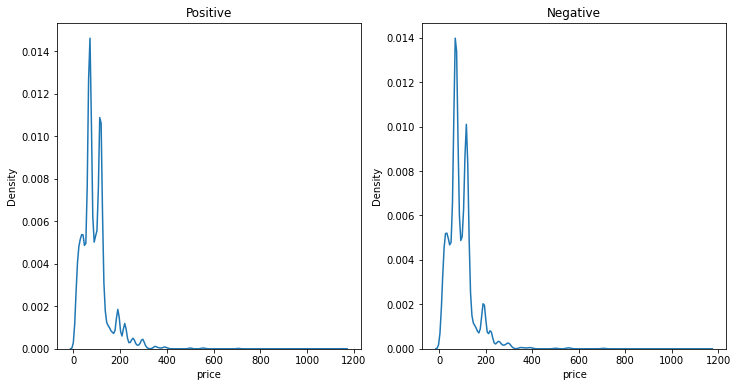

In [ ]:

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Positive")
ax2 = fig.add_subplot(1, 2, 2, title="Negative")

sns.kdeplot(df_merged[df_merged["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_merged[df_merged["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()



### Most reviews comes around $69

## **Step 2: Text Analytics**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web and social media analytics/stop_words_long.txt')]

First step is to remove stop words , here we will use above file to remove stop words because we dont want to remove "no,not" like words which help us in text analytics. Also we will remove any puncuation marks and numbers etc.

**Functions removing stop words , positive and negative words and punctuation marks**

In [ ]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):
    
    # change sentence to lower case
    document = document.lower()

       
    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    
    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document


In [ ]:
# function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]
    
    document = " ".join(words)
    
    return document

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

In [ ]:
# now run lemmatization 

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

### **Preprocessing review text for tableau visualization**

In [ ]:
# make new dataframe for only reviews and sentiment
df_review=df_merged[["reviewText","review_sentiment"]]

In [ ]:
df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_review["review_text_nostop"]

0        phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...
1        samsung v205 decided try e715 fyi people battery problems batteries drain completely charge it.....
2        samsung phone not measure-up v300 tmobile customer finally fed v300 terrible camera tmobile sent...
3        ..and europe phones networks better samsung currently best software huge nokia fan amazingly lig...
4        phone amazingly light camera phone flashlight/flash problems phone real problem battery life wor...
                                                        ...                                                 
63833                                             phone stolen not activate told comes stolen n't appreciate
63834                                                                                                   good
63835       purchased problems finally tossed screens glitching disappointing samsung usually great products
63836              

In [ ]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web and social media analytics/pos_words.txt')]

In [ ]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web and social media analytics/neg_words.txt')]

In [ ]:
df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# after removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_review["review_text_nostop"]

0        phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
1        samsung decide try fyi people battery problems batteries drain completely charge like build batt...
2        samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
3        europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4        phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...
                                                        ...                                                 
63833                                                    phone steal not activate tell come steal appreciate
63834                                                                                                   good
63835              purchase problems finally toss screen glitching disappoint samsung usually great products
63836              

In [ ]:
# divided positive and negative review in different dataframe to create word cloud in tableau

df_positive = df_review[df_review["review_sentiment"]=="POSITIVE"][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]=="NEGATIVE"][["review_text_nostop","review_sentiment"]]

In [ ]:
df_positive.head()

,review_text_nostop,review_sentiment
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...,POSITIVE
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...,POSITIVE
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...,POSITIVE
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...,POSITIVE
6,receive treo friday treocentral service sprint test compare sprint coverage against mobile veriz...,POSITIVE


In [ ]:
# checking rows of df_negative
df_negative.head()

,review_text_nostop,review_sentiment
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...,NEGATIVE
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...,NEGATIVE
12,frank high expectations treo read time lead release actual disappoint front deserve star usable ...,NEGATIVE
22,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...,NEGATIVE
23,not forum people express unhappiness believe reality sprint nextel service problems service rela...,NEGATIVE


In [ ]:
# prepare file for wordcloud negative and positive and export those file 
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [ ]:
pos_sentiment_features.head()

,review_text_nostop
1,samsung decide try fyi people battery problems batteries drain completely charge like build batt...
3,europe phone network better samsung currently best software huge nokia fan amazingly light intui...
4,phone amazingly light camera phone flashlight flash problems phone real problem battery life wor...
5,see explosion nice color phone market functionalities similar extra bonus bell whistle sell prod...
6,receive treo friday treocentral service sprint test compare sprint coverage against mobile veriz...


In [ ]:
neg_sentiment_features.head()

,review_text_nostop
0,phone ugly heavy terrible user interface techies like drop call like crazy manhattan moto better...
2,samsung phone not measure tmobile customer finally feed terrible camera tmobile send upgrade goo...
12,frank high expectations treo read time lead release actual disappoint front deserve star usable ...
22,chicago gps work yes window dozens time surround suburbs work miles north chicago not break unfo...
23,not forum people express unhappiness believe reality sprint nextel service problems service rela...


In [ ]:
lst_pos= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [ ]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [ ]:
print(len(merged_pos))
merged_pos

254329


['phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'mobile',
 'stay',
 'ugly',
 'monster',
 'samsung',
 'phone',
 'not',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'not',
 'speakerphone',
 'work',
 'well',
 'handy',
 'time',
 'simply',
 'like',
 'commodore'

In [ ]:
merged_neg

['phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'mobile',
 'stay',
 'ugly',
 'monster',
 'samsung',
 'phone',
 'not',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'not',
 'speakerphone',
 'work',
 'well',
 'handy',
 'time',
 'simply',
 'like',
 'commodore'

In [ ]:
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [ ]:
# Note : this two file already saved and used in tableau file

# df_pos.to_csv("/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/pos_sentiment_word.csv")
# df_neg.to_csv("/content/gdrive/My Drive/Web and Social Media Analytics - NLP Capstone Project/neg_sentiment_word.csv")

### **Note: Above code cell is commented out as files are saved in google drive for tableau visualisation**

## **Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

### Bag of words for Positive Sentiment

In [ ]:
positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [ ]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(positive_reviews)
print(bow_model)

  (0, 20273)	1
  (0, 5673)	1
  (0, 24302)	1
  (0, 9275)	1
  (0, 17049)	1
  (0, 2068)	3
  (0, 18187)	2
  (0, 2066)	1
  (0, 6726)	1
  (0, 4470)	1
  (0, 3736)	1
  (0, 13312)	2
  (0, 3073)	1
  (0, 13265)	2
  (0, 23734)	2
  (0, 11435)	1
  (0, 11353)	1
  (0, 14764)	1
  (0, 5398)	2
  (0, 22233)	1
  (0, 20775)	1
  (0, 9977)	3
  (0, 18869)	1
  (0, 17518)	1
  (0, 26501)	1
  :	:
  (47676, 10674)	2
  (47676, 1572)	1
  (47676, 13644)	1
  (47676, 13341)	2
  (47676, 8377)	1
  (47676, 6004)	1
  (47676, 14685)	1
  (47676, 15760)	1
  (47676, 4057)	1
  (47676, 15813)	1
  (47676, 6023)	1
  (47676, 21472)	1
  (47676, 16332)	1
  (47676, 3759)	1
  (47676, 10347)	2
  (47676, 7470)	1
  (47676, 13078)	1
  (47676, 15786)	1
  (47676, 481)	1
  (47676, 4756)	1
  (47676, 13085)	1
  (47676, 2525)	1
  (47676, 9301)	2
  (47676, 16778)	1
  (47676, 22259)	1


In [ ]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaa,aaaaa,aaaaammmmaaaaazzzziiiiinnnngggg,aaahs,aac,aacute,aadverts,aall,aand,...,zwh,zxs,zyb,zyeqgses,zynga,zywwhu,zyxel,zzg,zzodc,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#printing the feature names
print(bow_model.shape)
print(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(47677, 27040)
['aaa', 'aaaa', 'aaaaa', 'aaaaammmmaaaaazzzziiiiinnnngggg', 'aaahs', 'aac', 'aacute', 'aadverts', 'aall', 'aand', 'aapoor', 'aaqbddx', 'aarp', 'aarrgghh', 'aas', 'aasa', 'aauggh', 'aav', 'aback', 'abajo', 'abale', 'abandon', 'abandonned', 'abble', 'abbreviate', 'abbreviations', 'abc', 'abcdef', 'abcs', 'abd', 'abea', 'abeit', 'abhor', 'abilit', 'abilities', 'ability', 'abit', 'abject', 'able', 'ablilty', 'abm', 'abndroidm', 'abnormal', 'abnormally', 'aboard', 'abominable', 'abomination', 'abort', 'abou', 'abound', 'abouse', 'abouth', 'aboutwell', 'abput', 'abr', 'abraham', 'abrams', 'abrasive', 'abrasives', 'abreast', 'abreviated', 'abrir', 'abroad', 'abrupt', 'abruptly', 'abs', 'absence', 'absense', 'absent', 'absolsutely', 'absolute', 'absoluted', 'absolutely', 'absolutes', 'absolutley', 'absolutly', 'absorb', 'absorbent', 'absorption', 'absorptive', 'absoutely', 'abstain', 'abstract', 'absurd', 'absurdity', 'absurdly', 'abt', 'abtak', 'abtract', 'abundance', 'abundant

In [ ]:
#printing the vocabulary
vectorizer.vocabulary_

{'samsung': 20273,
 'decide': 5673,
 'try': 24302,
 'fyi': 9275,
 'people': 17049,
 'battery': 2068,
 'problems': 18187,
 'batteries': 2066,
 'drain': 6726,
 'completely': 4470,
 'charge': 3736,
 'like': 13312,
 'build': 3073,
 'life': 13265,
 'time': 23734,
 'improve': 11435,
 'immensely': 11353,
 'mobile': 14764,
 'customer': 5398,
 'stay': 22233,
 'service': 20775,
 'great': 9977,
 'rate': 18869,
 'plan': 17518,
 'work': 26501,
 'additional': 321,
 'feature': 8353,
 'little': 13413,
 'gadget': 9280,
 'caller': 3296,
 'pics': 17385,
 'able': 38,
 'external': 8066,
 'display': 6410,
 'flip': 8707,
 'person': 17166,
 'camera': 3319,
 'flash': 8641,
 'well': 26081,
 'zoom': 27008,
 'picture': 17393,
 'gray': 9967,
 'black': 2460,
 'white': 26190,
 'negative': 15441,
 'sepia': 20733,
 'sketch': 21245,
 'multi': 15123,
 'shoot': 20953,
 'lot': 13605,
 'frame': 8990,
 'download': 6677,
 'game': 9321,
 'whereas': 26159,
 'not': 15779,
 'furthermore': 9243,
 'actually': 271,
 'java': 12364,


In [ ]:
pos_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [ ]:
#pos_vocabular
pos_vocabular

,0
samsung,20273
decide,5673
try,24302
fyi,9275
people,17049
...,...
rampant,18832
officials,16086
formable,8889
deservedly,5971


### **Bag of words for Negative Sentiment**

In [ ]:
negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [ ]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(negative_reviews)
print(bow_model)

  (0, 7527)	2
  (0, 10806)	2
  (0, 4667)	1
  (0, 10326)	1
  (0, 11104)	1
  (0, 5299)	1
  (0, 10225)	1
  (0, 5805)	2
  (0, 2977)	1
  (0, 1362)	1
  (0, 2195)	1
  (0, 6093)	1
  (0, 6533)	2
  (0, 962)	3
  (0, 10162)	1
  (0, 7562)	1
  (0, 1663)	1
  (0, 8343)	1
  (0, 1549)	1
  (0, 6434)	1
  (0, 9837)	1
  (0, 6495)	1
  (1, 7527)	12
  (1, 10326)	1
  (1, 11104)	1
  :	:
  (16154, 6440)	1
  (16155, 6497)	1
  (16155, 8794)	1
  (16155, 9885)	1
  (16155, 11241)	1
  (16156, 4381)	1
  (16156, 3486)	1
  (16157, 5415)	1
  (16157, 8744)	1
  (16158, 7527)	1
  (16158, 6841)	2
  (16158, 9486)	1
  (16158, 5938)	1
  (16158, 4040)	1
  (16158, 9995)	1
  (16158, 9323)	1
  (16158, 8320)	1
  (16159, 7527)	1
  (16159, 6841)	1
  (16159, 1781)	1
  (16159, 10288)	1
  (16159, 113)	1
  (16159, 9843)	2
  (16159, 529)	1
  (16160, 3486)	1


In [ ]:
#printing the feature names
neg_words=vectorizer.get_feature_names()
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

11795
['aaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaa', 'aab', 'aacute', 'aall', 'aback', 'abad', 'abajo', 'abandon', 'abbreviate', 'abbreviations', 'abc', 'abe', 'abhorrent', 'abiertas', 'abierto', 'abilities', 'ability', 'abirthday', 'abismal', 'able', 'abnormal', 'aboutique', 'abrasive', 'abres', 'abrir', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absoulty', 'absurd', 'absurdly', 'abundance', 'abundant', 'abuse', 'abvious', 'abysmal', 'aca', 'acabado', 'acabados', 'academic', 'accebility', 'accecssable', 'accelerometer', 'accelorometer', 'accent', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accesible', 'accesories', 'accesorios', 'accesory', 'access', 'accessability', 'accessibilities', 'accessibility', 'accessible', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'accommodate', 'accomodate', 'accompany', 'accomplice', 'accomplish', 'accord', 'accordingly', 'account', 'accountability'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#print the vocabulary
vectorizer.vocabulary_

{'phone': 7527,
 'ugly': 10806,
 'heavy': 4667,
 'terrible': 10326,
 'user': 11104,
 'interface': 5299,
 'techies': 10225,
 'like': 5805,
 'drop': 2977,
 'call': 1362,
 'crazy': 2195,
 'manhattan': 6093,
 'moto': 6533,
 'better': 962,
 'take': 10162,
 'picture': 7562,
 'clarity': 1663,
 'reception': 8343,
 'cheaper': 1549,
 'mobile': 6434,
 'stay': 9837,
 'monster': 6495,
 'samsung': 8959,
 'not': 6841,
 'measure': 6180,
 'tmobile': 10524,
 'customer': 2294,
 'finally': 3823,
 'feed': 3769,
 'camera': 1378,
 'send': 9164,
 'upgrade': 11059,
 'good': 4338,
 'feature': 3760,
 'external': 3638,
 'antenna': 457,
 'brake': 1170,
 'comfortable': 1788,
 'bad': 778,
 'sound': 9653,
 'quality': 8143,
 'receiver': 8337,
 'tinny': 10497,
 'digital': 2701,
 'unlike': 10948,
 'realize': 8297,
 'receive': 8336,
 'lack': 5635,
 'maybe': 6164,
 'spoil': 9735,
 'technology': 10238,
 'example': 3468,
 'easy': 3084,
 'datebook': 2366,
 'set': 9213,
 'alarm': 280,
 'remind': 8554,
 'appointments': 528,
 '

In [ ]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [ ]:
neg_vocabular

,0
phone,7527
ugly,10806
heavy,4667
terrible,10326
user,11104
...,...
slowwwwww,9493
guyana,4512
imagination,4985
mobo,6440


**Completed data pre-processing, EDA and Text Analytics for Part 1 and prepared all necessary files including csv file for Tableau dashboard and Wordcloud.**